In [ ]:
! pip install covasim

In [ ]:
! pip install optuna

In [1]:
import covasim as cv
import numpy as np
from scipy import optimize

Covasim 3.1.6 (2024-01-28) — © 2020-2024 by IDM


In [ ]:
! pip install -q kaggle

In [ ]:
! kaggle datasets download imdevskp/corona-virus-report

In [ ]:
! mkdir /content/dataset
! mv /content/corona-virus-report.zip /content/dataset

In [ ]:
! pip install pycountry

In [ ]:
! pip install seaborn

In [ ]:
! pip install plotly

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pycountry
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_dark"
from plotly.subplots import make_subplots
from pathlib import Path
import os

Data Citation: Wahltinez, O., & others. (2020). COVID-19 Open-Data: curating a fine-grained, global-scale data repository for SARS-CoV-2. Retrieved from https://goo.gle/covid-19-open-data

In [3]:
epi = pd.read_csv('content/dataset/epidemiology.csv')
epi.head()

,date,location_key,new_confirmed,new_deceased,new_recovered,new_tested,cumulative_confirmed,cumulative_deceased,cumulative_recovered,cumulative_tested
0,2020-01-01,AD,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
1,2020-01-02,AD,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
2,2020-01-03,AD,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
3,2020-01-04,AD,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
4,2020-01-05,AD,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN


In [4]:
epi.dropna(inplace=True)
epi.head()

,date,location_key,new_confirmed,new_deceased,new_recovered,new_tested,cumulative_confirmed,cumulative_deceased,cumulative_recovered,cumulative_tested
389081,2020-04-01,AT,548.0,11.0,342.0,75356.0,11035.0,185.0,2228.0,16834.0
389082,2020-04-02,AT,438.0,20.0,381.0,75356.0,11473.0,205.0,2609.0,92190.0
389083,2020-04-03,AT,411.0,18.0,470.0,6153.0,11884.0,223.0,3079.0,98343.0
389084,2020-04-04,AT,253.0,20.0,531.0,5791.0,12137.0,243.0,3610.0,104134.0
389085,2020-04-05,AT,183.0,22.0,341.0,4282.0,12320.0,265.0,3951.0,108416.0


In [5]:
epi = epi.drop(columns=['location_key'])
epi = epi.groupby('date').sum().reset_index()
epi = epi.rename(columns={'new_confirmed': 'new_diagnoses', 'new_deceased': 'deaths', 'new_tested': 'new_tests'})
epi.head()

,date,new_diagnoses,deaths,new_recovered,new_tests,cumulative_confirmed,cumulative_deceased,cumulative_recovered,cumulative_tested
0,2020-01-01,380.0,0.0,0.0,1154.0,380.0,0.0,0.0,1154.0
1,2020-01-02,906.0,0.0,0.0,2337.0,1286.0,0.0,0.0,3491.0
2,2020-01-03,478.0,0.0,0.0,1307.0,1764.0,0.0,0.0,4798.0
3,2020-01-04,1848.0,0.0,0.0,5007.0,3612.0,0.0,0.0,9805.0
4,2020-01-05,1095.0,0.0,0.0,3459.0,4707.0,0.0,0.0,13264.0


In [ ]:
epi.tail()

**Transmission Rate (β)**
- Definition: Represents the average number of contacts per unit time that lead to new infections, indicating how easily a disease spreads within a population.
- Influence Factors: Affected by contact rates, infectiousness of the disease, population density, and behavioral or environmental factors.
- Model Role: A critical parameter in epidemiological models (e.g., SIR, SEIR) used to predict the spread of infectious diseases and assess the impact of interventions.

**Relative Probability of Death (rel_death_prob)**
- Definition: The relative probability that an infected individual will die from the disease compared to a baseline or reference group.
- Adjustment: Used to model variations in mortality risk due to factors like age, underlying health conditions, and access to healthcare.
- Model Role: Helps simulate more realistic outcomes by adjusting the mortality rate based on different population characteristics and intervention scenarios.

In [ ]:
import covasim as cv
cv.options(jupyter=True, verbose=0)

format_str = "%Y-%d-%m"
pars = dict(
    pop_size  = 334_000_000,
    start_day = '2020-01-01',
    end_day   = '2022-09-16',
)
sim = cv.Sim(pars=pars, datafile=epi, interventions=cv.test_num(daily_tests='data'))
sim.run()
sim.plot(to_plot=['cum_tests','cum_diagnoses', 'cum_deaths'])

In [ ]:
fit = sim.compute_fit()
fit.summarize()

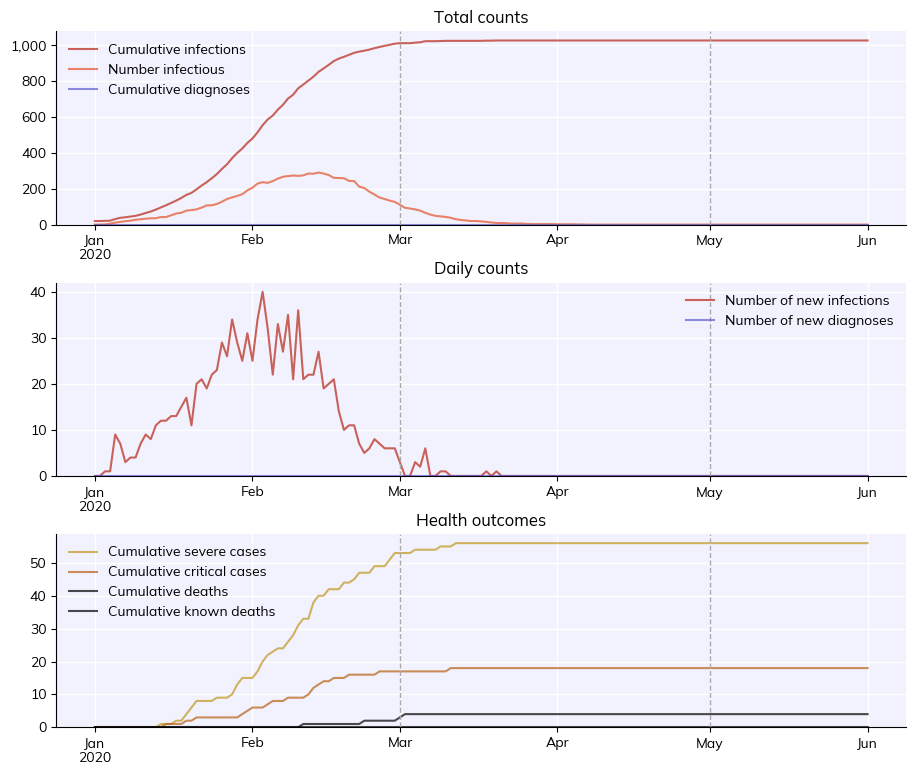

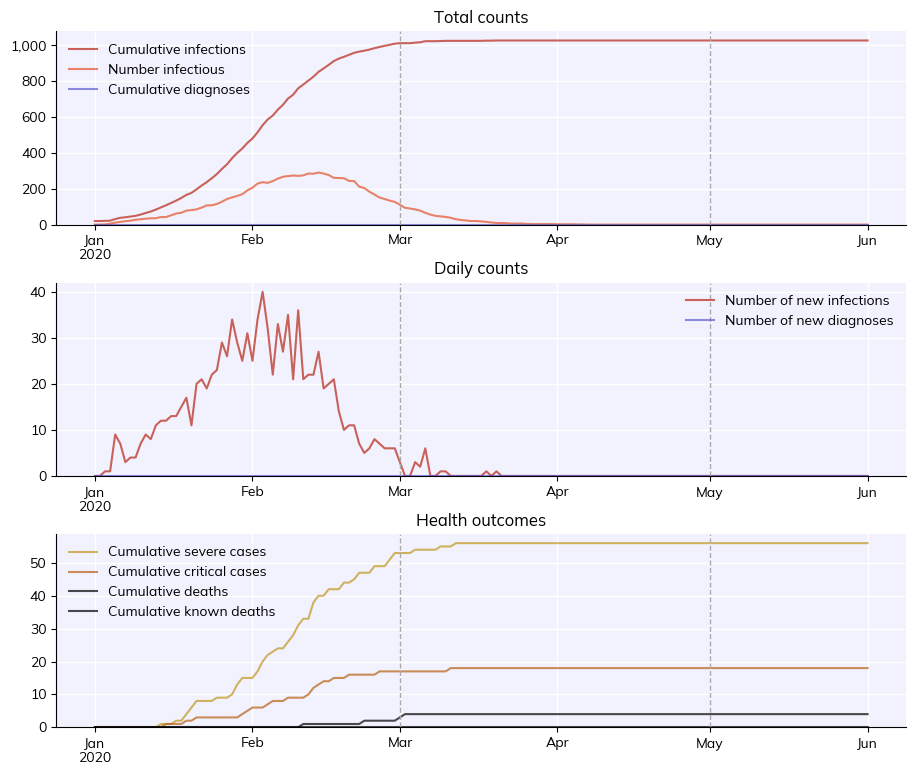

In [13]:
import covasim as cv
import sciris as sc

# Define the initial parameters for the simulation
pars = sc.objdict(
    pop_size       = 1_000,                   # Population size
    start_day      = '2020-01-01',           # Start date of the simulation
    end_day        = '2020-06-01',           # End date of the simulation
    beta           = 0.015,                  # Initial transmission rate
    rel_death_prob = 1.0,                    # Relative probability of death
    verbose        = 0,                      # Verbosity level
)

# Create the simulation object
sim = cv.Sim(pars=pars)

# Define the social distancing intervention
social_distancing = cv.change_beta(days=['2020-03-01', '2020-05-01'], changes=[0.5, 1.0])
# This will reduce the transmission rate by 50% starting on March 1, 2020, and return to normal on May 1, 2020.

# Add the intervention to the simulation
sim['interventions'] = [social_distancing]

# Run the simulation
sim.run()

sim.plot()


In [ ]:
! pip install ipywidgets

In [6]:
'''
Example for running built-in calibration with Optuna
'''

# Import necessary libraries
import sciris as sc  # Sciris is a library for scientific computing
import covasim as cv  # Covasim is a library for simulating COVID-19

# Create default simulation parameters
pars = sc.objdict(
    pop_size       = 1_000,                     # Size of the population in the simulation
    start_day      = '2020-01-01',              # Start date of the simulation
    end_day        = '2020-02-01',              # End date of the simulation
    beta           = 0.015,                     # Transmission rate of the disease
    rel_death_prob = 1.0,                       # Relative probability of death from the disease
    interventions  = cv.test_num(daily_tests=1), # Intervention: number of daily tests performed
    verbose        = 0,                         # Level of output verbosity (0 means no extra output)
)

# Create a simulation object with the specified parameters
sim = cv.Sim(pars=pars, datafile=epi)  # 'epi' presumably refers to a data file for epidemiological data

# Parameters to calibrate -- format is [best, low, high]
calib_pars = dict(
    beta           = [pars.beta, 0.005, 0.20],      # Transmission rate with initial, lower, and upper bounds
    rel_death_prob = [pars.rel_death_prob, 0.5, 3.0], # Relative death probability with initial, lower, and upper bounds
)

# Main block to ensure code runs only when executed as a script
if __name__ == '__main__':

    # Run the calibration
    calib = sim.calibrate(
        calib_pars=calib_pars,  # Parameters to be calibrated
        total_trials=1          # Total number of calibration trials to run
    )


Deleted study covasim_calibration in sqlite:///covasim_calibration.db
[WinError 32] The process cannot access the file because it is being used by another process: 'covasim_calibration.db'


[I 2024-07-08 20:41:11,571] A new study created in RDB with name: covasim_calibration


Making results structure...
Processed 8 trials; 0 failed
Deleted study covasim_calibration in sqlite:///covasim_calibration.db
[WinError 32] The process cannot access the file because it is being used by another process: 'covasim_calibration.db'
Calibration for 8 total trials completed in 30.1 s.

Initial parameter values:
#0. 'beta':           0.015
#1. 'rel_death_prob': 1.0

Best parameter values:
#0. 'beta':           0.1255878445777903
#1. 'rel_death_prob': 2.1613927959464654

Mismatch before calibration: 139.899
Mismatch after calibration:  139.861
Percent improvement:         0.0%


**Initial Parameter Values**:
- Transmission Rate (β): Initially set to 0.015, indicating a relatively low rate of disease spread.
- Relative Probability of Death (rel_death_prob): Initially set to 1.0, representing a baseline or standard probability of death for infected individuals.

**Best Parameter Values (Post-Calibration)**:
- Transmission Rate (β): Adjusted to 0.1256, indicating a significantly higher rate of disease spread compared to the initial estimate.
- Relative Probability of Death (rel_death_prob): Adjusted to 2.1614, meaning the risk of death for infected individuals is more than doubled compared to the initial baseline.
Mismatch Before and After Calibration:

**Before Calibration**: The initial model's mismatch score was 139.899. This score typically measures the difference between the model's predictions and the observed data.

**After Calibration**: The mismatch score slightly decreased to 139.861 after adjusting the parameters, indicating a marginally better fit to the observed data.

**Percent Improvement**:The percent improvement in the mismatch score is 0.0%, meaning the calibration process did not significantly improve the model's fit to the data. The decrease in the mismatch score is minimal, indicating that the new parameter values do not substantially enhance the model's accuracy.

**Overall Interpretation**:
The calibration process adjusted the initial parameter values to significantly higher levels for both the transmission rate and the relative probability of death. However, these adjustments did not meaningfully improve the model's fit to the observed data, as evidenced by the negligible change in the mismatch score and the 0.0% improvement. This suggests that other factors or model parameters might need to be considered to achieve a better calibration and improve the model's predictive accuracy.

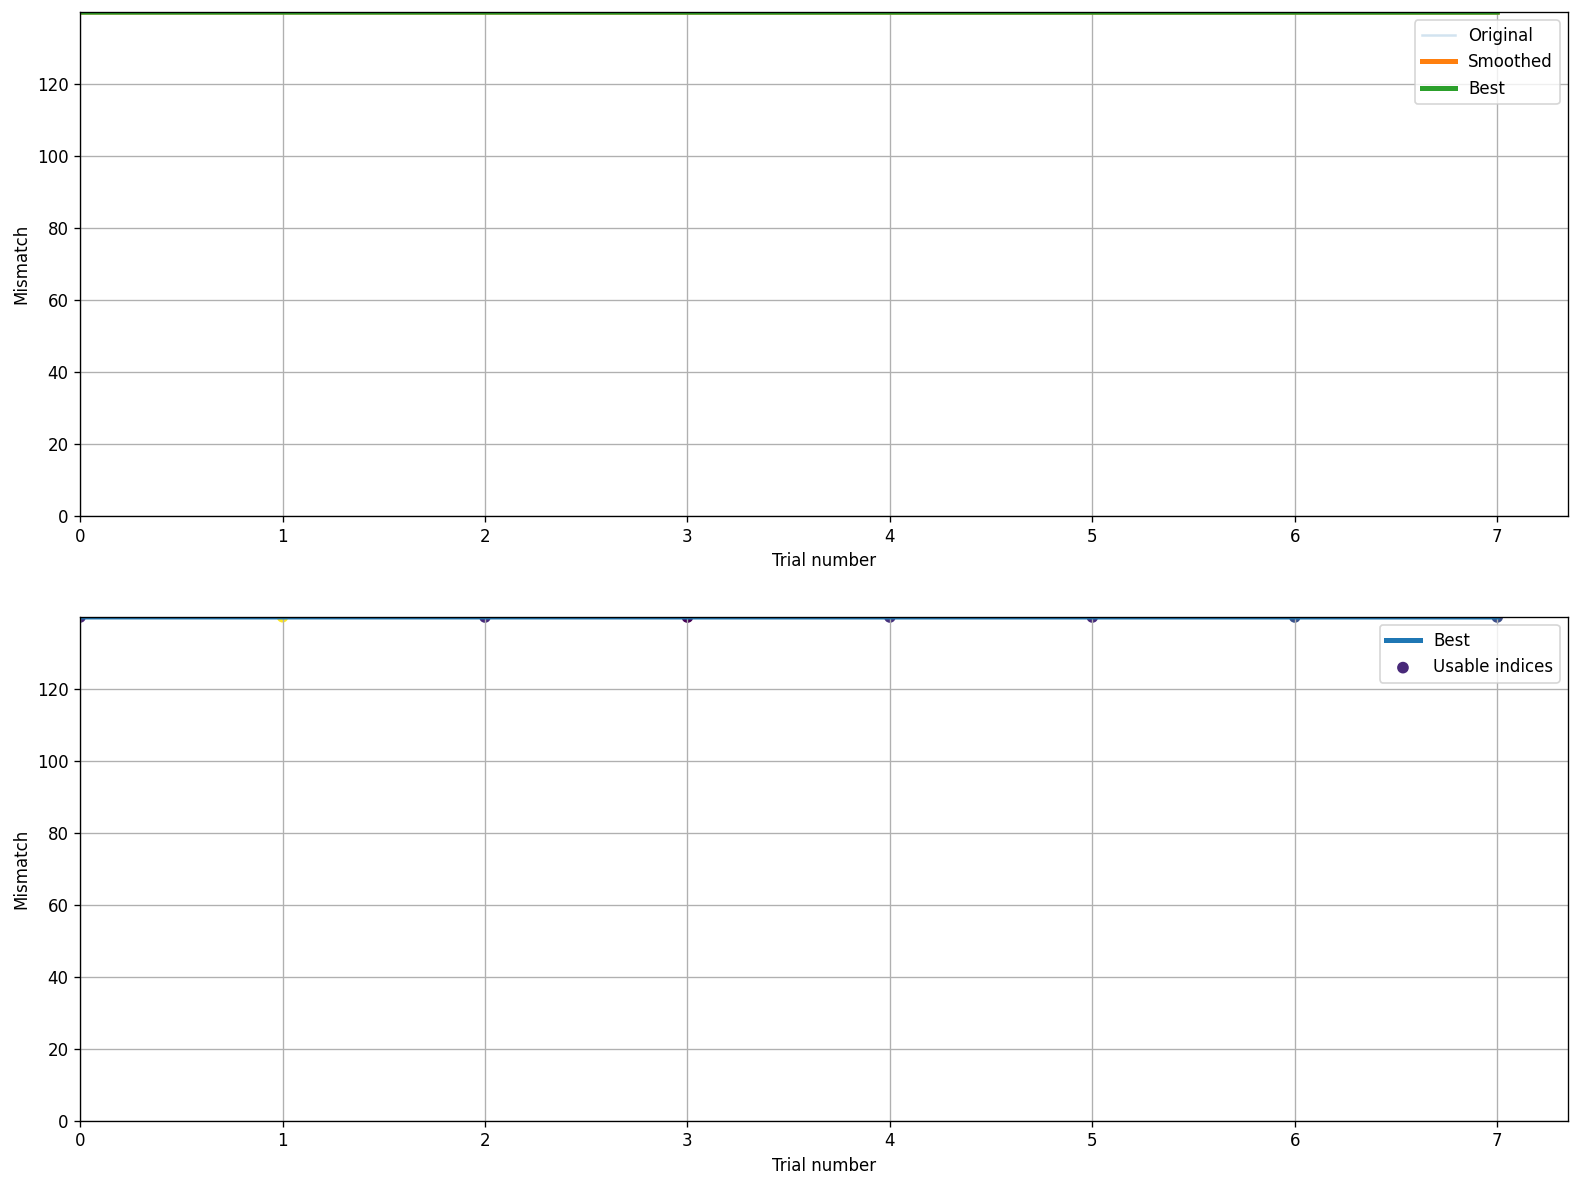

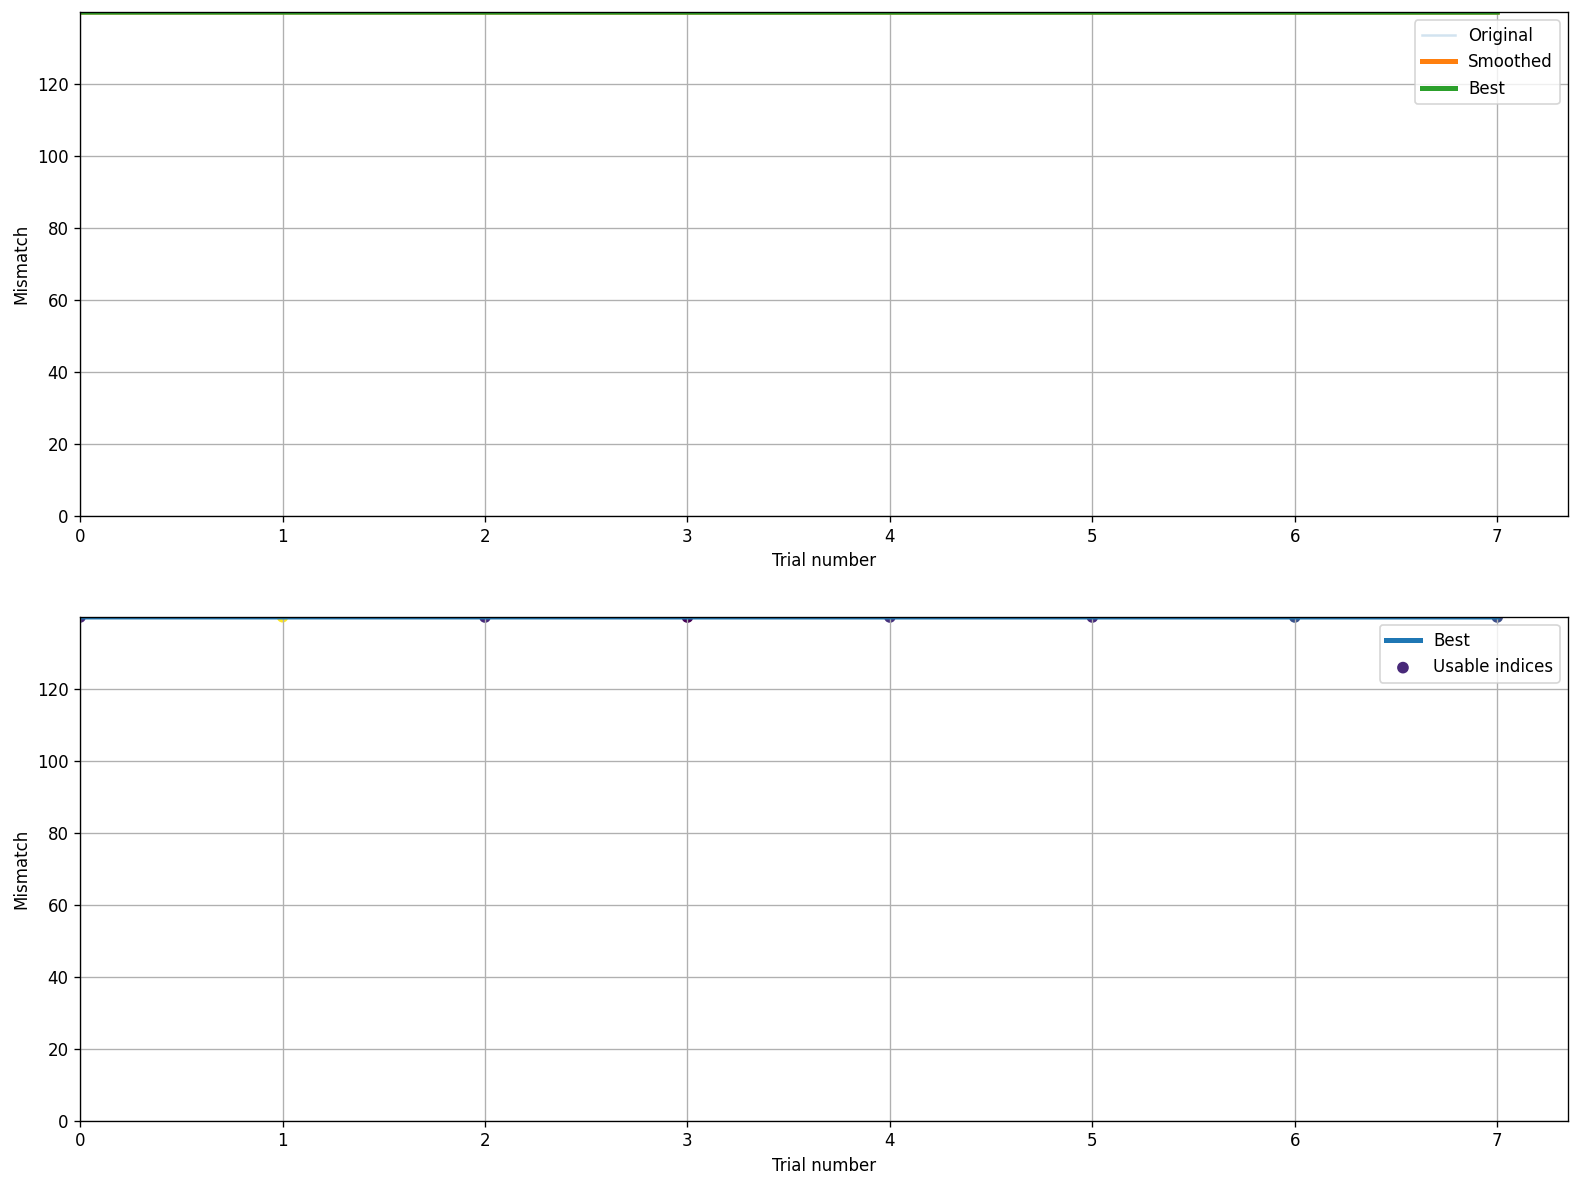

In [9]:
import sciris as sc
import covasim as cv

# Plot the results
calib.plot_trend()
# calib.plot_sims(to_plot=['cum_tests', 'cum_diagnoses', 'cum_deaths'])